In [1]:
# Volkswagen Buyout Porche - Announcement 1 and 2
# Volkswagen Dieselgate Scandal - Dieselgate
# BMW => Market Benchmark

1 - Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest
from arch import arch_model
import warnings
warnings.filterwarnings("ignore")
sns.set()

2 - Load Dataset

In [3]:
df = pd.read_csv("automobile-indexes-preprocessed.csv", index_col=["Date"])
df.index = pd.to_datetime(df.index)
df.head()

,vol,por,bmw,ret_vol,ret_por,ret_bmw,sq_vol,sq_por,sq_bmw,q_vol,q_por,q_bmw
Date,,,,,,,,,,,,
2009-01-29,27.121136,24.616135,10.875431,1.225257,-3.831346,-3.582730,1.501255,14.679210,12.835952,175749.0,629474.0,5951883.0
2009-01-30,27.065256,25.202362,11.059665,-0.206037,2.381476,1.694036,0.042451,5.671429,2.869756,330777.0,1467863.0,3368505.0
2009-02-02,25.312124,24.194273,10.465377,-6.477426,-3.999979,-5.373471,41.957044,15.999828,28.874190,217917.0,1350452.0,4149233.0
2009-02-03,25.088619,24.091171,10.771433,-0.882996,-0.426141,2.924463,0.779682,0.181596,8.552481,210250.0,1183009.0,3953543.0
2009-02-04,25.731203,24.033892,11.511320,2.561256,-0.237762,6.868977,6.560034,0.056531,47.182844,182653.0,1688343.0,4844579.0


In [4]:
df.tail()

,vol,por,bmw,ret_vol,ret_por,ret_bmw,sq_vol,sq_por,sq_bmw,q_vol,q_por,q_bmw
Date,,,,,,,,,,,,
2022-05-25,145.440002,71.839996,77.790001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2022-05-26,151.339996,73.320000,80.250000,4.056651,2.060138,3.162359,16.456421,4.244170,10.000514,884473.0,528086.0,1068788.0
2022-05-27,151.339996,73.320000,80.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2022-05-30,151.339996,73.320000,80.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2022-05-31,154.679993,76.139999,80.629997,2.206949,3.846153,0.473517,4.870623,14.792896,0.224218,1193371.0,1398660.0,1807592.0


3 - Defining Key Dates

In [5]:
# Starting Date
start_date = "2009-01-29"
# First Official Announcement - Volkswagen Buy 49.9% of Porche
ann_1 = "2009-12-09"
# Second Official Announcement - Volkswagen Buy Rest 51.1% of Porche
ann_2 = "2012-07-05"
# Ending Date
end_date = "2022-05-31"
# Dieselgate
d_gate = "2015-09-20"

4 - Plotting Data

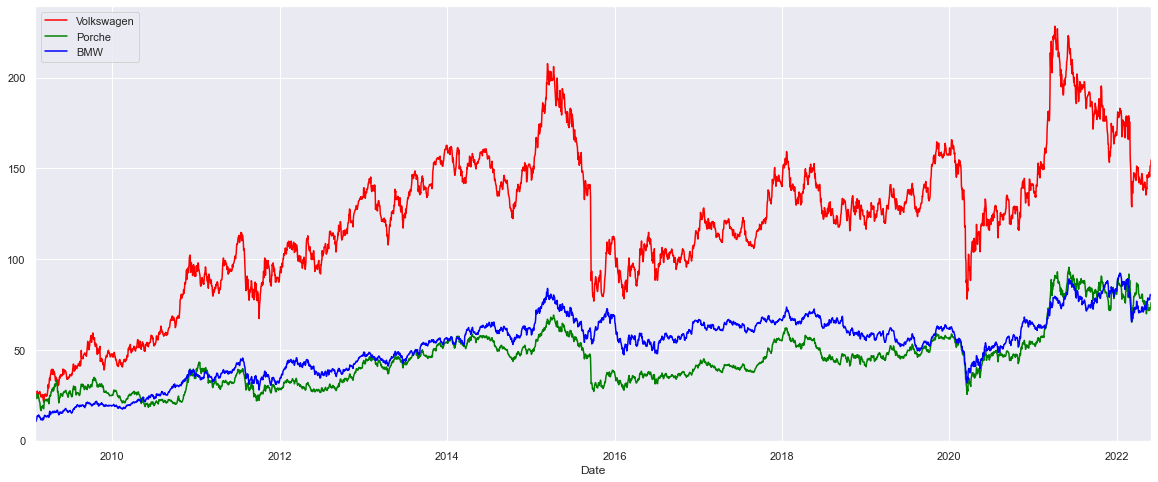

In [6]:
df['vol'][start_date:end_date].plot(figsize=(20, 8), color="red", label="Volkswagen")
df['por'][start_date:end_date].plot(color="green", label="Porche")
df['bmw'][start_date:end_date].plot(color="blue", label="BMW")
plt.legend()
plt.show()

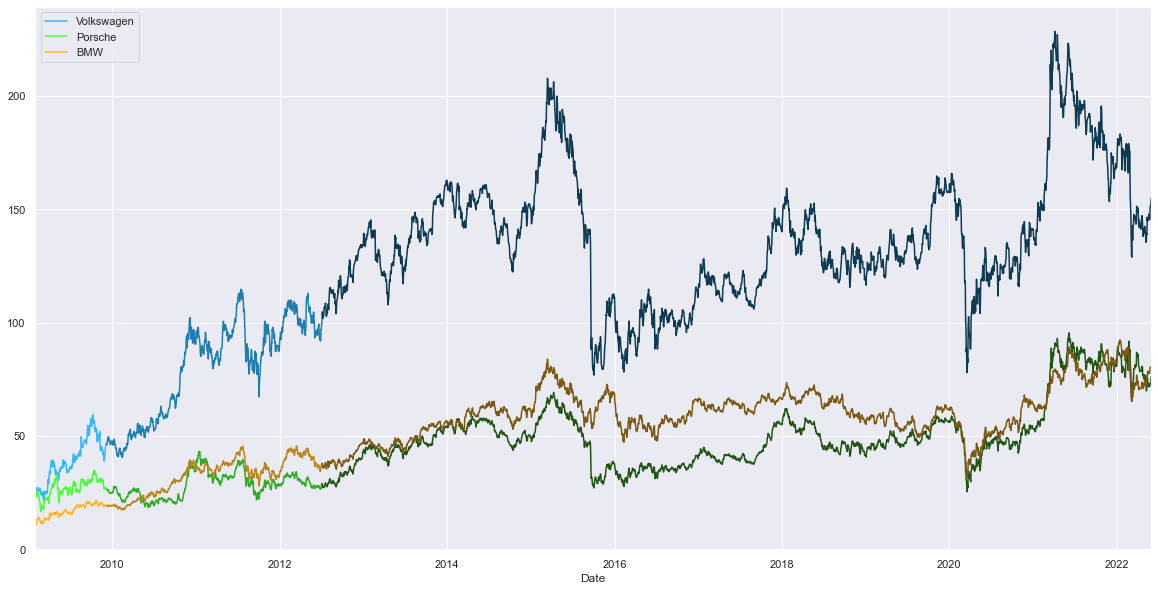

In [7]:
df['vol'][start_date:ann_1].plot(figsize=(20, 10), color="#33B8FF")
df['por'][start_date:ann_1].plot(color="#49FF3A")
df['bmw'][start_date:ann_1].plot(color="#FEB628")

df['vol'][ann_1:ann_2].plot(color="#1E7EB2")
df['por'][ann_1:ann_2].plot(color="#2FAB25")
df['bmw'][ann_1:ann_2].plot(color="#BA861F")

df['vol'][ann_2:end_date].plot(color="#0E3A52")
df['por'][ann_2:end_date].plot(color="#225414")
df['bmw'][ann_2:end_date].plot(color="#7C5913")

plt.legend(['Volkswagen', 'Porsche', 'BMW'])
plt.show()

5 - Correlation

In [8]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(end_date) + ' From Beginning Till End' + '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufacturers from 2009-01-29 to 2022-05-31 From Beginning Till End

Volkswagen and Porsche correlation: 	0.8947985270851609
Volkswagen and BMW correlation: 	0.8757931238306235
Porsche and BMW correlation: 		0.8335703292504594


In [9]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(ann_1) + ' From Beginning Till Announcement 1' + '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Correlation among manufacturers from 2009-01-29 to 2009-12-09 From Beginning Till Announcement 1

Volkswagen and Porsche correlation: 	0.8229989224661409
Volkswagen and BMW correlation: 	0.9197573009062862
Porsche and BMW correlation: 		0.8064740017891378


In [10]:
print('Correlation among manufacturers from ' + str(ann_1) + ' to ' + str(ann_2) + ' From Announcement 1 Till Announcement 2' + '\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Correlation among manufacturers from 2009-12-09 to 2012-07-05 From Announcement 1 Till Announcement 2

Volkswagen and Porsche correlation: 	0.7434173003744841
Volkswagen and BMW correlation: 	0.9795877938330712
Porsche and BMW correlation: 		0.7051170645031354


In [11]:
print('Correlation among manufacturers from ' + str(ann_2) + ' to ' + str(d_gate) + ' From Announcement 2 Till Dieselgate Scandal' +'\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][ann_2:d_gate].corr(df['por'][ann_2:d_gate])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][ann_2:d_gate].corr(df['bmw'][ann_2:d_gate])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][ann_2:d_gate].corr(df['bmw'][ann_2:d_gate])))

Correlation among manufacturers from 2012-07-05 to 2015-09-20 From Announcement 2 Till Dieselgate Scandal

Volkswagen and Porsche correlation: 	0.9438529046288954
Volkswagen and BMW correlation: 	0.9245292246093431
Porsche and BMW correlation: 		0.9283941501846806


In [12]:
print('Correlation among manufacturers from ' + str(d_gate) + ' to ' + str(end_date) + ' From Dieselgate Scandal Till Present' +'\n')
print('Volkswagen and Porsche correlation: \t'+ str(df['vol'][d_gate:end_date].corr(df['por'][d_gate:end_date])))
print('Volkswagen and BMW correlation: \t'+ str(df['vol'][d_gate:end_date].corr(df['bmw'][d_gate:end_date])))
print('Porsche and BMW correlation: \t\t'+ str(df['por'][d_gate:end_date].corr(df['bmw'][d_gate:end_date])))

Correlation among manufacturers from 2015-09-20 to 2022-05-31 From Dieselgate Scandal Till Present

Volkswagen and Porsche correlation: 	0.941753677564486
Volkswagen and BMW correlation: 	0.7099654475099046
Porsche and BMW correlation: 		0.7874191026929097


6 - Best Fitting Model - Volkswagen

In [13]:
mod_pr_pre_vol = auto_arima(df.vol[start_date:ann_1], exogenous=df[['por', 'bmw']][start_date:ann_1],
                            m=5, max_p=5, max_q=5)
mod_pr_btn_1_vol = auto_arima(df.vol[ann_1:ann_2], exogenous=df[['por', 'bmw']][ann_1:ann_2],
                            m=5, max_p=5, max_q=5)
mod_pr_btn_2_vol = auto_arima(df.vol[ann_2:d_gate], exogenous=df[['por', 'bmw']][ann_2:d_gate],
                            m=5, max_p=5, max_q=5)
mod_pr_post_vol = auto_arima(df.vol[d_gate:end_date], exogenous=df[['por', 'bmw']][d_gate:end_date],
                            m=5, max_p=5, max_q=5)

In [14]:
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -383.186
Date:                Wed, 29 Jun 2022   AIC                            776.371
Time:                        11:45:30   BIC                            793.452
Sample:                    01-29-2009   HQIC                           783.265
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3537      0.269      1.313      0.189      -0.174       0.882
por            0.4065      0.076      5.363      0.000       0.258       0.555
bmw            0.6517      0.244      2.668      0.008       0.173       1.130
ar.L1          0.9792      0.014     69.536      0.000       0.952       1.007
sigma2         1.7403      0.102     17.089      0.000       1.541       1.940
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               239.33
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                            -0.48
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
mod_pr_btn_1_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1040.587
Date:                Wed, 29 Jun 2022   AIC                           2091.175
Time:                        11:45:30   BIC                           2113.719
Sample:                    12-09-2009   HQIC                          2099.906
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            0.7649      0.060     12.720      0.000       0.647       0.883
bmw            1.6006      0.075     21.285      0.000       1.453       1.748
ar.L1          0.9286      0.032     29.386      0.000       0.867       0.991
ma.L1         -0.9702      0.022    -44.773      0.000      -1.013      -0.928
sigma2         1.3014      0.054     24.263      0.000       1.196       1.406
===================================================================================
Ljung-Box (L1) (Q):                   1.10   Jarque-Bera (JB):               111.47
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
mod_pr_btn_2_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  837
Model:             SARIMAX(0, 1, 0)x(0, 0, [1], 5)   Log Likelihood               -1238.022
Date:                             Wed, 29 Jun 2022   AIC                           2484.044
Time:                                     11:45:30   BIC                           2502.959
Sample:                                 07-05-2012   HQIC                          2491.295
                                      - 09-18-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            1.9028      0.041     46.969      0.000       1.823       1.982
bmw            0.7556      0.050     15.127      0.000       0.658       0.854
ma.S.L5       -0.0751      0.034     -2.241      0.025      -0.141      -0.009
sigma2         1.1319      0.040     28.506      0.000       1.054       1.210
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               137.78
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -0.31
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1747
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3013.122
Date:                Wed, 29 Jun 2022   AIC                           6034.245
Time:                        11:45:30   BIC                           6056.105
Sample:                    09-21-2015   HQIC                          6042.327
                         - 05-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            1.6269      0.020     80.900      0.000       1.587       1.666
bmw            0.7843      0.028     28.145      0.000       0.730       0.839
ma.L1         -0.1376      0.009    -14.646      0.000      -0.156      -0.119
sigma2         1.8470      0.027     68.251      0.000       1.794       1.900
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             19894.09
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               3.03   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

7 - Best Fitting Model - Porsche

In [18]:
mod_pr_pre_por = auto_arima(df.por[start_date:ann_1], exogenous=df[['vol', 'bmw']][start_date:ann_1],
                            m=5, max_p=5, max_q=5)
mod_pr_btn_1_por = auto_arima(df.por[ann_1:ann_2], exogenous=df[['vol', 'bmw']][ann_1:ann_2],
                            m=5, max_p=5, max_q=5)
mod_pr_btn_2_por = auto_arima(df.por[ann_2:d_gate], exogenous=df[['vol', 'bmw']][ann_2:d_gate],
                            m=5, max_p=5, max_q=5)
mod_pr_post_por = auto_arima(df.por[d_gate:end_date], exogenous=df[['vol', 'bmw']][d_gate:end_date],
                            m=5, max_p=5, max_q=5)

In [19]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -273.354
Date:                Wed, 29 Jun 2022   AIC                            560.707
Time:                        11:47:17   BIC                            584.620
Sample:                    01-29-2009   HQIC                           570.359
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2128      0.119      1.795      0.073      -0.020       0.445
vol            0.1348      0.046      2.923      0.003       0.044       0.225
bmw            0.8289      0.111      7.495      0.000       0.612       1.046
ar.L1          1.7881      0.118     15.201      0.000       1.558       2.019
ar.L2         -0.8163      0.106     -7.721      0.000      -1.023      -0.609
ma.L1         -0.7689      0.149     -5.161      0.000      -1.061      -0.477
sigma2         0.6587      0.042     15.807      0.000       0.577       0.740
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               433.51
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                            -0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
mod_pr_btn_1_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -557.974
Date:                Wed, 29 Jun 2022   AIC                           1125.949
Time:                        11:47:17   BIC                           1148.492
Sample:                    12-09-2009   HQIC                          1134.680
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.1815      0.016     11.104      0.000       0.149       0.214
bmw            0.3458      0.048      7.222      0.000       0.252       0.440
ar.L1          0.6711      0.216      3.103      0.002       0.247       1.095
ma.L1         -0.6022      0.232     -2.591      0.010      -1.058      -0.147
sigma2         0.3089      0.010     32.427      0.000       0.290       0.328
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1076.65
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.39   Skew:                             0.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
mod_pr_btn_2_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  837
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -378.604
Date:                Wed, 29 Jun 2022   AIC                            771.208
Time:                        11:47:17   BIC                            804.309
Sample:                    07-05-2012   HQIC                           783.898
                         - 09-18-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.2462      0.008     32.673      0.000       0.231       0.261
bmw            0.1608      0.018      8.980      0.000       0.126       0.196
ar.L1          0.1981      0.032      6.278      0.000       0.136       0.260
ar.L2         -0.9281      0.032    -29.111      0.000      -0.991      -0.866
ma.L1         -0.2486      0.026     -9.437      0.000      -0.300      -0.197
ma.L2          0.9536      0.026     36.674      0.000       0.903       1.005
sigma2         0.1448      0.004     33.707      0.000       0.136       0.153
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               533.50
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
mod_pr_post_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1747
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1555.653
Date:                Wed, 29 Jun 2022   AIC                           3121.307
Time:                        11:47:17   BIC                           3148.632
Sample:                    09-21-2015   HQIC                          3131.409
                         - 05-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.3052      0.003    110.930      0.000       0.300       0.311
bmw            0.1767      0.011     16.396      0.000       0.156       0.198
ar.L1          0.4647      0.086      5.394      0.000       0.296       0.634
ma.L1         -0.5557      0.085     -6.542      0.000      -0.722      -0.389
sigma2         0.3479      0.004     94.981      0.000       0.341       0.355
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             32819.08
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               8.84   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

8 - Best Fitting Model - BMW

In [23]:
mod_pr_pre_bmw = auto_arima(df.bmw[start_date:ann_1], exogenous=df[['vol', 'por']][start_date:ann_1],
                            m=5, max_p=5, max_q=5)
mod_pr_btn_1_bmw = auto_arima(df.bmw[ann_1:ann_2], exogenous=df[['vol', 'por']][ann_1:ann_2],
                            m=5, max_p=5, max_q=5)
mod_pr_btn_2_bmw = auto_arima(df.bmw[ann_2:d_gate], exogenous=df[['vol', 'por']][ann_2:d_gate],
                            m=5, max_p=5, max_q=5)
mod_pr_post_bmw = auto_arima(df.bmw[d_gate:end_date], exogenous=df[['vol', 'por']][d_gate:end_date],
                            m=5, max_p=5, max_q=5)

In [24]:
mod_pr_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  225
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -383.186
Date:                Wed, 29 Jun 2022   AIC                            776.371
Time:                        11:48:14   BIC                            793.452
Sample:                    01-29-2009   HQIC                           783.265
                         - 12-09-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3537      0.269      1.313      0.189      -0.174       0.882
por            0.4065      0.076      5.363      0.000       0.258       0.555
bmw            0.6517      0.244      2.668      0.008       0.173       1.130
ar.L1          0.9792      0.014     69.536      0.000       0.952       1.007
sigma2         1.7403      0.102     17.089      0.000       1.541       1.940
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               239.33
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.58   Skew:                            -0.48
Prob(H) (two-sided):                  0.05   Kurtosis:                         7.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
mod_pr_btn_1_bmw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  672
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -395.140
Date:                Wed, 29 Jun 2022   AIC                            802.281
Time:                        11:48:14   BIC                            829.342
Sample:                    12-09-2009   HQIC                           812.761
                         - 07-05-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0772      0.043      1.810      0.070      -0.006       0.161
vol            0.2361      0.010     24.800      0.000       0.217       0.255
por            0.1968      0.025      7.765      0.000       0.147       0.246
ar.L1          0.9894      0.005    180.672      0.000       0.979       1.000
ma.L1         -0.0927      0.035     -2.662      0.008      -0.161      -0.024
sigma2         0.1888      0.009     20.556      0.000       0.171       0.207
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                10.89
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
mod_pr_btn_2_bmw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  837
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 5)   Log Likelihood                -680.610
Date:                           Wed, 29 Jun 2022   AIC                           1369.220
Time:                                   11:48:14   BIC                           1388.135
Sample:                               07-05-2012   HQIC                          1376.471
                                    - 09-18-2015                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
vol            0.1992      0.013     15.288      0.000       0.174       0.225
por            0.3224      0.044      7.398      0.000       0.237       0.408
ar.S.L5       -0.0844      0.035     -2.391      0.017      -0.154      -0.015
sigma2         0.2983      0.008     38.544      0.000       0.283       0.313
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              1409.38
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               2.12   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
mod_pr_post_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1747
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3013.122
Date:                Wed, 29 Jun 2022   AIC                           6034.245
Time:                        11:48:15   BIC                           6056.105
Sample:                    09-21-2015   HQIC                          6042.327
                         - 05-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
por            1.6269      0.020     80.900      0.000       1.587       1.666
bmw            0.7843      0.028     28.145      0.000       0.730       0.839
ma.L1         -0.1376      0.009    -14.646      0.000      -0.156      -0.119
sigma2         1.8470      0.027     68.251      0.000       1.794       1.900
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             19894.09
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               3.03   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

9 - Training and Testing - Volkswagen

In [28]:
# Training the model from start_date to ann_1
model_auto_pred_pr = auto_arima(df.vol[start_date:ann_1], exogenous=df[['por', 'bmw']][start_date:ann_1],
                                m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend="ct")
# Predicting trends from ann_1 to ann_2
df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_1:ann_2]), exogenous=df[['por', 'bmw']][ann_1:ann_2]),
                            index=df[ann_1:ann_2].index)

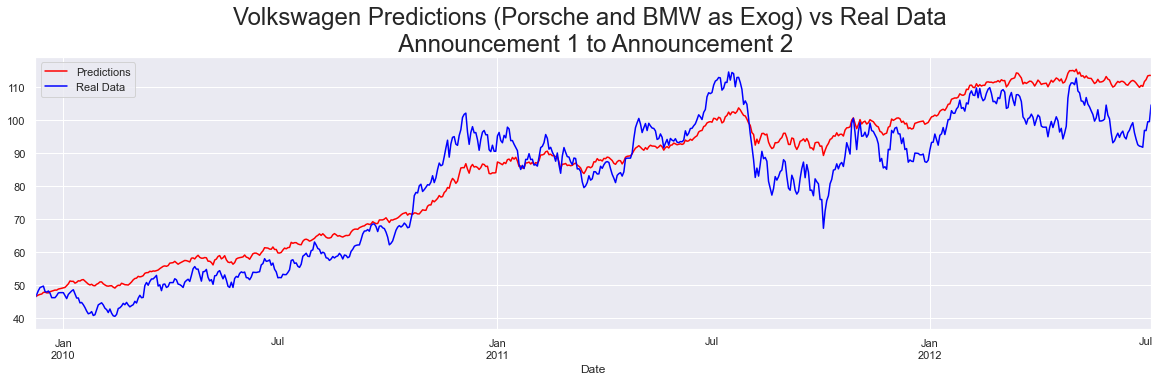

In [29]:
df_auto_pred_pr[ann_1:ann_2].plot(figsize=(20, 5), color="red") # predictions
df.vol[ann_1:ann_2].plot(color="blue") # real data
plt.title("Volkswagen Predictions (Porsche and BMW as Exog) vs Real Data \n Announcement 1 to Announcement 2", size=24)
plt.legend(['Predictions', 'Real Data'])
plt.show()

In [30]:
# Training the model from ann_1 to ann_2
model_auto_pred_pr = auto_arima(df.vol[ann_1:ann_2], exogenous=df[['por', 'bmw']][ann_1:ann_2],
                                m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend="ct")
# Predicting trends from ann_2 to d_gate
df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[ann_2:d_gate]), exogenous=df[['por', 'bmw']][ann_2:d_gate]),
                                index=df[ann_2:d_gate].index)

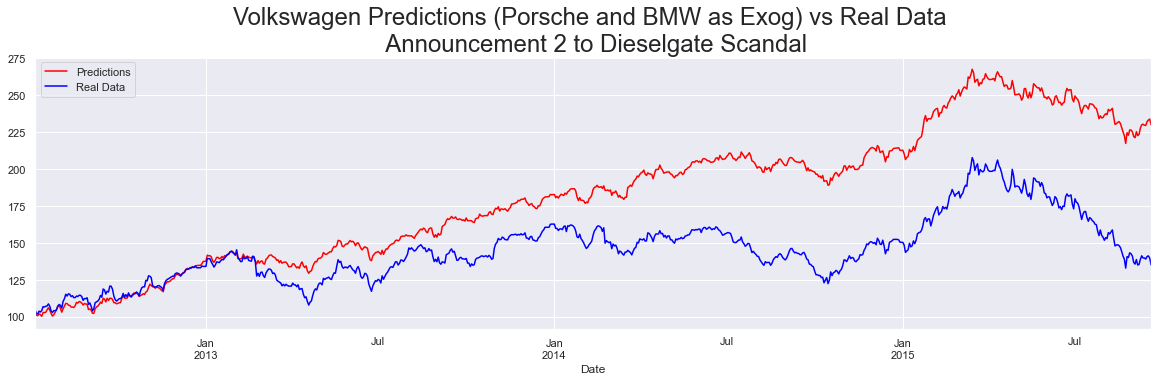

In [31]:
df_auto_pred_pr[ann_2:d_gate].plot(figsize=(20, 5), color="red")  # predictions
df.vol[ann_2:d_gate].plot(color="blue")  # real data
plt.title("Volkswagen Predictions (Porsche and BMW as Exog) vs Real Data \n Announcement 2 to Dieselgate Scandal", size=24)
plt.legend(['Predictions', 'Real Data'])
plt.show()

In [32]:
# Training the model from ann_2 to d_gate
model_auto_pred_pr = auto_arima(df.vol[ann_2:d_gate], exogenous=df[['por', 'bmw']][ann_2:d_gate],
                                m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend="ct")
# Predicting trends from d_gate to end_date
df_auto_pred_pr = pd.DataFrame(model_auto_pred_pr.predict(n_periods=len(df[d_gate:end_date]), exogenous=df[['por', 'bmw']][d_gate:end_date]),
                                index=df[d_gate:end_date].index)

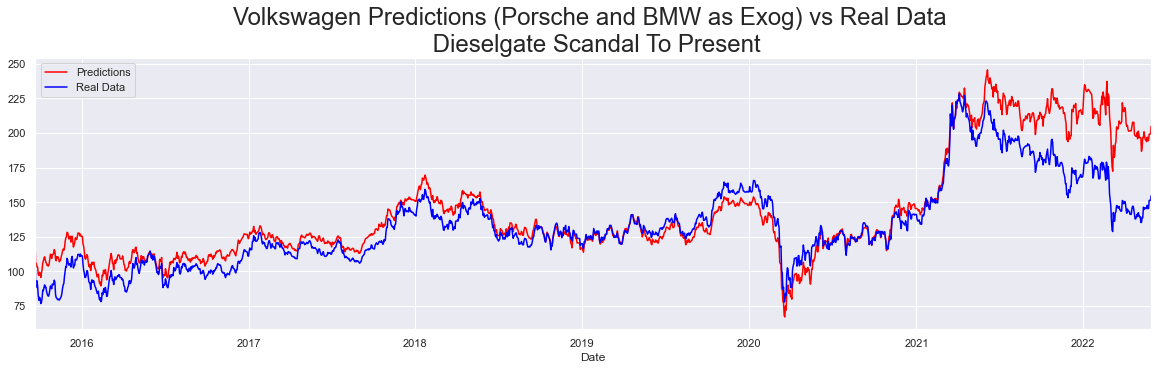

In [33]:
df_auto_pred_pr[d_gate:end_date].plot(figsize=(20, 5), color="red")  # predictions
df.vol[d_gate:end_date].plot(color="blue")  # real data
plt.title("Volkswagen Predictions (Porsche and BMW as Exog) vs Real Data \n Dieselgate Scandal To Present", size=24)
plt.legend(['Predictions', 'Real Data'])
plt.show()

10 - Volatility For Each Period - Volkswagen

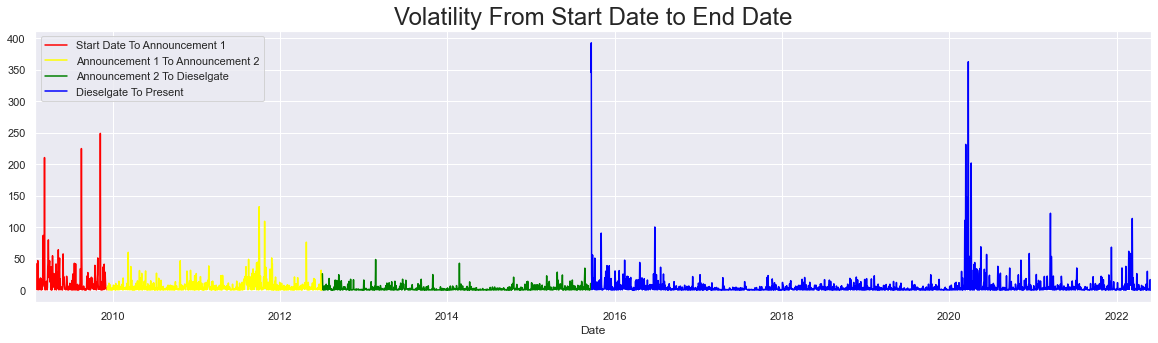

In [34]:
df['sq_vol'][start_date:ann_1].plot(figsize=(20, 5), color="red")
df['sq_vol'][ann_1:ann_2].plot(color="yellow")
df['sq_vol'][ann_2:d_gate].plot(color="green")
df['sq_vol'][d_gate:end_date].plot(color="blue")
plt.legend(['Start Date To Announcement 1', 'Announcement 1 To Announcement 2', 'Announcement 2 To Dieselgate', 'Dieselgate To Present'], loc="upper left")
plt.title("Volatility From Start Date to End Date", size=24)
plt.show()

11 - Volatility Training and Testing - Volkswagen

In [35]:
# Training start_date to d_gate
model_garch_pre = arch_model(df.ret_vol[start_date:d_gate], mean="Constant",  vol="GARCH", p=1, q=1)
results_garch_pre = model_garch_pre.fit(update_freq=5, first_obs=start_date ,last_obs=d_gate)

Iteration:      5,   Func. Count:     32,   Neg. LLF: 3690.673736028633
Iteration:     10,   Func. Count:     61,   Neg. LLF: 3682.3307977987106
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3682.330573612683
            Iterations: 14
            Function evaluations: 80
            Gradient evaluations: 14


In [36]:
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3682.33
Distribution:                  Normal   AIC:                           7372.66
Method:            Maximum Likelihood   BIC:                           7394.49
                                        No. Observations:                 1732
Date:                Wed, Jun 29 2022   Df Residuals:                     1731
Time:                        11:48:44   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0956  4.386e-02      2.179  2.930e-02 [9.626e-03,  0.182]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0336  2.030e-02      1.654  9.806e-02 [-6.206e-03,7.339e-02]
alpha[1]       0.0564  1.930e-02      2.924  3.455e-03  [1.861e-02,9.428e-02]
beta[1]        0.9372  2.002e-02     46.822      0.000      [  0.898,  0.976]
=============================================================================

Covariance estimator: robust
"""

In [37]:
# Predicting Volatility 1 year after Dieselgate Scandal
pred_days = 365
pred_garch = results_garch_pre.forecast(horizon=pred_days, reindex=True)

In [38]:
pred_vol = pd.DataFrame(pred_garch.residual_variance[-1:].T)
pred_vol = pred_vol.reset_index(drop=True)
pred_vol['Date'] = "2015-09-20"
pred_vol['Days'] = range(1, 1+len(pred_vol))
pred_vol['Date'] = pd.to_datetime(pred_vol['Date'])
pred_vol['Date'] = pred_vol['Date'] + pd.to_timedelta(pred_vol['Days'], unit='d')
pred_vol = pred_vol.drop(["Days"], axis=1)
pred_vol = pred_vol.set_index('Date')
pred_vol.index.name = "Date"
pred_vol.columns = ['Volatility']
pred_vol

,Volatility
Date,
2015-09-21,4.122914
2015-09-22,4.130099
2015-09-23,4.137237
2015-09-24,4.144329
2015-09-25,4.151376
...,...
2016-09-15,5.133581
2016-09-16,5.134292
2016-09-17,5.134998


In [39]:
pred_vol = pred_vol.asfreq('b')
pred_vol

,Volatility
Date,
2015-09-21,4.122914
2015-09-22,4.130099
2015-09-23,4.137237
2015-09-24,4.144329
2015-09-25,4.151376
...,...
2016-09-13,5.132146
2016-09-14,5.132866
2016-09-15,5.133581


In [40]:
req_date = pd.to_datetime(d_gate) + pd.DateOffset(days=pred_days)
print(req_date)
df.loc[d_gate:req_date, 'vol']

2016-09-19 00:00:00


Date
2015-09-21    109.956863
2015-09-22     88.165123
2015-09-23     92.739731
2015-09-24     93.280373
2015-09-25     89.246391
                 ...    
2016-09-13    101.696686
2016-09-14    102.071487
2016-09-15    101.946556
2016-09-16     98.240150
2016-09-19     99.531143
Name: vol, Length: 261, dtype: float64

In [41]:
pred_vol['Prices'] = df.loc[d_gate:req_date, 'vol']
pred_vol

,Volatility,Prices
Date,,
2015-09-21,4.122914,109.956863
2015-09-22,4.130099,88.165123
2015-09-23,4.137237,92.739731
2015-09-24,4.144329,93.280373
2015-09-25,4.151376,89.246391
...,...,...
2016-09-13,5.132146,101.696686
2016-09-14,5.132866,102.071487
2016-09-15,5.133581,101.946556


In [42]:
pred_vol.isna().sum()

Volatility    0
Prices        0
dtype: int64

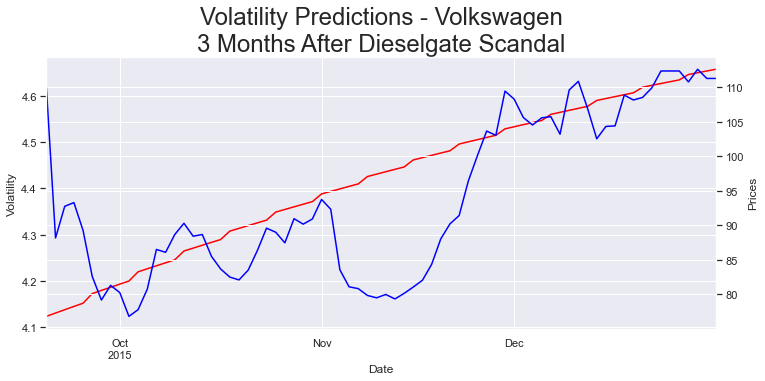

In [43]:
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title("Volatility Predictions - Volkswagen\n3 Months After Dieselgate Scandal", size=24)
ax2 = ax.twinx()
pred_vol.Volatility.loc["2015-09-21":"2015-12-31"].plot(x="Date", y="Volatility", ax=ax, color="red")
pred_vol.Prices.loc["2015-09-21":"2015-12-31"].plot(x="Date", y="Prices", ax=ax2, color="blue")
ax.set_ylabel("Volatility")
ax2.set_ylabel("Prices")
plt.show()

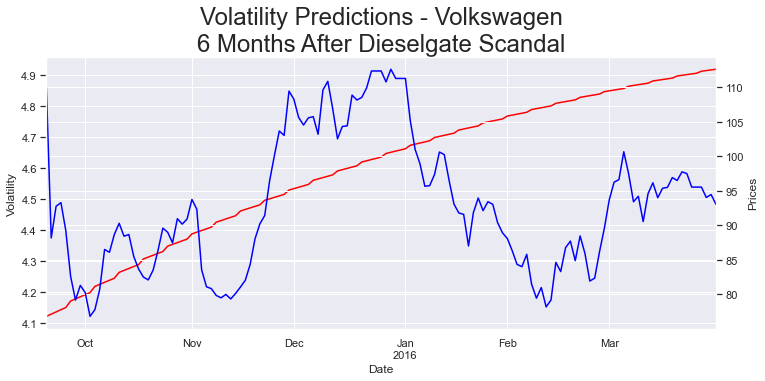

In [44]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title(
    "Volatility Predictions - Volkswagen\n6 Months After Dieselgate Scandal", size=24)
ax2 = ax.twinx()
pred_vol.Volatility.loc["2015-09-21":"2016-03-31"].plot(
    x="Date", y="Volatility", ax=ax, color="red")
pred_vol.Prices.loc["2015-09-21":"2016-03-31"].plot(
    x="Date", y="Prices", ax=ax2, color="blue")
ax.set_ylabel("Volatility")
ax2.set_ylabel("Prices")
plt.show()

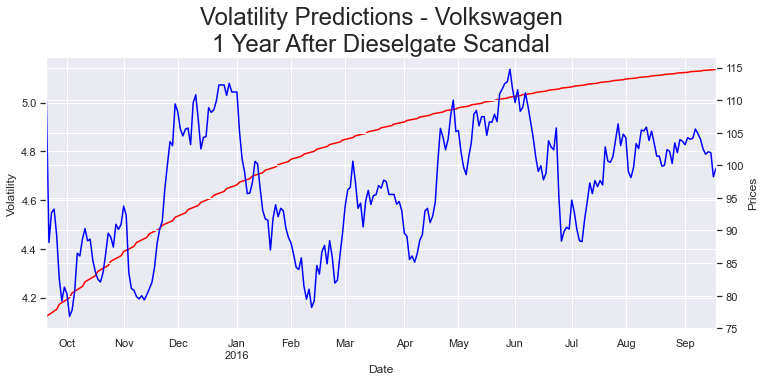

In [45]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title(
    "Volatility Predictions - Volkswagen\n1 Year After Dieselgate Scandal", size=24)
ax2 = ax.twinx()
pred_vol.Volatility.loc["2015-09-21":"2016-09-19"].plot(
    x="Date", y="Volatility", ax=ax, color="red")
pred_vol.Prices.loc["2015-09-21":"2016-09-19"].plot(
    x="Date", y="Prices", ax=ax2, color="blue")
ax.set_ylabel("Volatility")
ax2.set_ylabel("Prices")
plt.show()

12 - Forecasting Volatility - Volatility

In [46]:
# Training start_date to end_date
model_garch_pre = arch_model(df.ret_vol[start_date:end_date], mean="Constant",  vol="GARCH", p=1, q=1)
results_garch_pre = model_garch_pre.fit(update_freq=5, first_obs=start_date ,last_obs=end_date)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 7419.691458282846
Iteration:     10,   Func. Count:     65,   Neg. LLF: 7401.262714533906
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7401.260645362312
            Iterations: 13
            Function evaluations: 79
            Gradient evaluations: 13


In [47]:
# Predicting Volatility 1 year after End Date
pred_days = 365
pred_garch = results_garch_pre.forecast(horizon=pred_days, reindex=True)

In [48]:
pred_vol = pd.DataFrame(pred_garch.residual_variance[-1:].T)
pred_vol = pred_vol.reset_index(drop=True)
pred_vol['Date'] = "2022-05-31"
pred_vol['Days'] = range(1, 1+len(pred_vol))
pred_vol['Date'] = pd.to_datetime(pred_vol['Date'])
pred_vol['Date'] = pred_vol['Date'] + \
    pd.to_timedelta(pred_vol['Days'], unit='d')
pred_vol = pred_vol.drop(["Days"], axis=1)
pred_vol = pred_vol.set_index('Date')
pred_vol.index.name = "Date"
pred_vol.columns = ['Volatility']
pred_vol = pred_vol.asfreq('b')
pred_vol

,Volatility
Date,
2022-06-01,3.859273
2022-06-02,3.883243
2022-06-03,3.906995
2022-06-06,3.976965
2022-06-07,3.999867
...,...
2023-05-25,6.399232
2023-05-26,6.400148
2023-05-29,6.402848


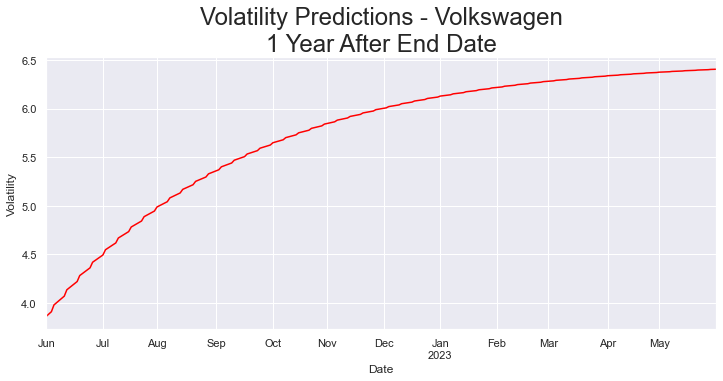

In [49]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_title("Volatility Predictions - Volkswagen\n1 Year After End Date", size=24)
pred_vol.Volatility.plot(x="Date", y="Volatility", ax=ax, color="red")
ax.set_ylabel("Volatility")
plt.show()